In [199]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.stats import boxcox

In [200]:
insurance = pd.read_csv('dataset/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [201]:
# dataset info
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [202]:
# dataset shape
insurance.shape

(1338, 7)

# Check & remove duplicate value

In [203]:
# check duplicate value
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [204]:
# sum of duplicate date
insurance.duplicated().sum()

1

In [205]:
# drop/remove duplicate
insurance = insurance.drop_duplicates()
insurance.duplicated().sum()

0

# Check Null value

In [206]:
# check null value
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [207]:
insurance.age.min()

18

In [208]:
insurance.age.max()

64

# Apply data bining

In [209]:
# create new column
age_bining = insurance['age']
age_bining

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1337, dtype: int64

In [210]:
df = pd.DataFrame(age_bining)

# create data bining label
cut_lables = ['before_teenage', 'teenage', 'adult', 'old']

# define cut ranges
cut_bins = [17, 20, 30, 45, 64]

# binning (convert numerical to categorical data for the range)
df['age_bining'] = pd.cut(insurance['age'], bins=cut_bins, labels=cut_lables)
df

,age,age_bining
0,19,before_teenage
1,18,before_teenage
2,28,teenage
3,33,adult
4,32,adult
...,...,...
1333,50,old
1334,18,before_teenage
1335,18,before_teenage
1336,21,teenage


# Apply boxcox transformation for "Age" column (Before and After Transformation)

lmbda:  0.625120301930163


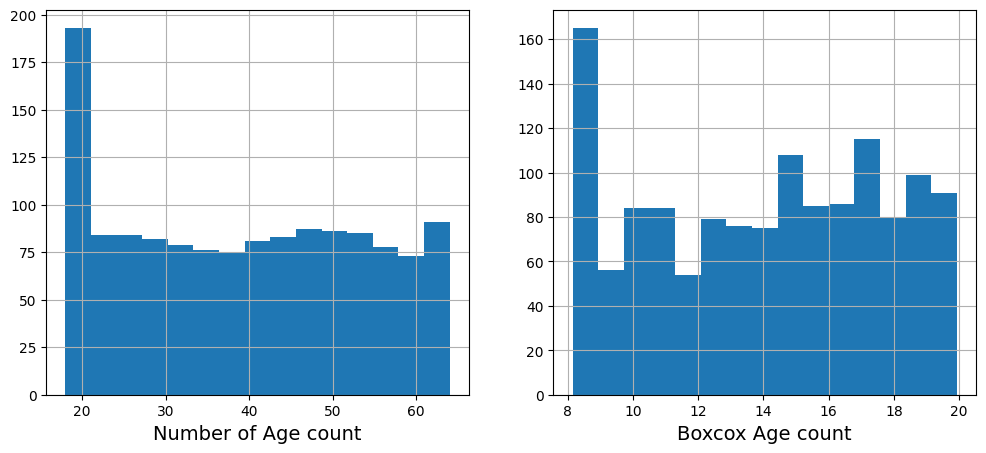

In [220]:
train = insurance.copy()

y = train['age']
y, fitted_lambda = boxcox(y, lmbda=None)

print("lmbda: ", fitted_lambda)

train['boxcox_age'] = y

#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# x axis label
ax1.set_xlabel("Number of Age count", fontsize=14)
ax2.set_xlabel("Boxcox Age count", fontsize=14)

# plot data to histogram graph
train['age'].hist(ax=ax1, bins=15)
train['boxcox_age'].hist(ax=ax2, bins=15)

plt.show()